In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import face_recognition

In [7]:
data=pd.read_csv("LBPH_Faces_Train.csv")

In [8]:
face_cascade = cv2.CascadeClassifier('Haarcascades\haarcascade_frontalface_default.xml')

In [9]:
imgpath = 'nptel\Y16CS863.jpg'

In [10]:
img = cv2.imread(imgpath)

In [11]:
img=cv2.resize(img,(2000,2400))

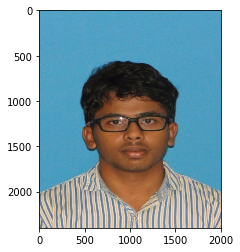

In [12]:
plt.imshow(img[:,:,::-1])
plt.show()

In [13]:
print("enter label : ")
lab=imgpath[6:14]
print(lab)

enter label : 
Y16CS863


In [14]:
img1 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [15]:
faces = face_cascade.detectMultiScale(img1,scaleFactor = 1.07, minNeighbors=14)

In [20]:
def LBP(a):
    print(a.shape)
    m=a.shape[0]
    n=a.shape[1]
    lbp=np.array([[0 for i in range(n-2)] for j in range(m-2)])
    for i in range(m-2):
        for j in range(n-2):
            pat=''
            ther=a[i+1][j+1]
            if ther>a[i][j]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+1]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+1][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+2][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i+1][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+2]:
                pat+='0'
            else:
                pat+='1'
            if ther>a[i][j+1]:
                pat+='0'
            else:
                pat+='1'
            lbp[i][j]=int(pat,2)
    return lbp

In [21]:
def HOG(img):
    grid_x,grid_y=9,9
    print(img.shape)
    m=img.shape[0]//grid_x
    n=img.shape[1]//grid_y
    hist=[]
    for i in range(grid_x-1):
        for j in range(grid_y-1):
            temp=img[j*m:(j+1)*m,i*n:(i+1)*n]
            x=np.reshape(temp,[1,m*n])
            #plt.hist(x[0],bins=256)
            hist1, bin_edges = np.histogram(x,bins=256)
            hist.append(hist1)
    hist=np.array(hist)
    return hist

(2200, 1600)
(2198, 1598)


C:\Users\Dinesh\Anaconda3\lib\site-packages\pandas\core\frame.py:6201: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  sort=sort)


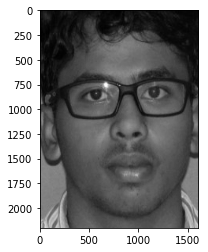

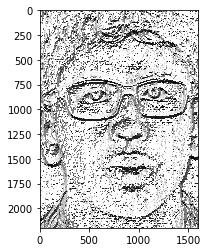

In [22]:
for (x,y,w,h) in faces:
    crop_img = img1[y:y+h, x:x+w]
    crop_img=cv2.resize(crop_img,(1600,2200))
    lbp_img = LBP(crop_img)
    histogram=HOG(lbp_img)
    df1=pd.DataFrame({'Pictures':[lbp_img],'histogram':[histogram],'label':[lab]})
    data=data.append(df1)
    plt.imshow(crop_img,cmap='gray')
    plt.show()
    plt.imshow(lbp_img,cmap='gray')
    plt.show()

In [23]:
data

,Pictures,Unnamed: 0,histogram,label
0,[[255 255 255 ... 127 127 255]\r\n [255 255 25...,0.0,[[ 46 0 0 ... 0 0 26579]\r\n...,Y16CS868
1,[[247 193 247 ... 255 127 255]\r\n [255 247 22...,0.0,[[ 204 0 0 ... 0 0 18499]\r\n...,Y16CS863
2,[[255 255 127 ... 255 255 255]\r\n [ 28 62 12...,0.0,[[ 547 0 0 ... 0 0 11996]\r\n...,Y16CS863
3,[[255 255 127 ... 255 127 127]\r\n [255 255 12...,0.0,[[ 1068 0 0 ... 0 0 5838]\r\n...,Y16CS863
4,[[255 255 255 ... 127 127 127]\r\n [255 255 24...,0.0,[[ 90 0 0 ... 0 0 31897]\r\n...,Y16CS868
5,[[255 255 255 ... 193 255 255]\r\n [255 255 25...,0.0,[[ 1 0 0 ... 0 0 33785]\r\n...,Y16CS919
6,[[255 127 255 ... 255 255 255]\r\n [255 255 25...,0.0,[[ 794 0 0 ... 0 0 8537]\r\n...,Y16CS919
7,[[255 255 255 ... 127 127 127]\r\n [255 255 25...,0.0,[[ 488 0 0 ... 0 0 14170]\r\n...,Y16CS919
8,[[255 255 255 ... 193 193 255]\r\n [255 255 25...,0.0,[[ 73 0 0 ... 0 0 16997]\r\n...,Y16CS919
9,[[255 255 221 ... 255 255 255]\r\n [255 255 25...,0.0,[[ 69 0 0 ... 0 0 22665]\r\n...,Y16CS863


# Recognition Image

In [131]:
imgpath = 'Images\sample15.jpg'

In [132]:
rec_img = cv2.imread(imgpath)

In [133]:
gray_img=cv2.resize(rec_img,(800,600))

In [134]:
gray_img = cv2.cvtColor(gray_img,cv2.COLOR_BGR2GRAY)

In [135]:
faces = face_cascade.detectMultiScale(gray_img,scaleFactor = 1.05, minNeighbors=7)

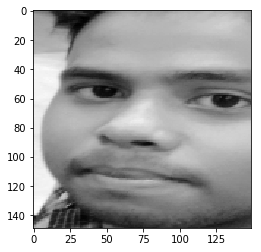

Y16CS828 515162
Y16CS828 16304
Y16CS828 16223
Y16CS868 546299
Y16CS863 702335
Y16CS828


In [146]:
for (x,y,w,h) in faces:
    crop_img = gray_img[y:y+h, x:x+w]
    lbp_img = LBP(crop_img)
    histogram=HOG(lbp_img)
    hist=np.array(data['histogram'])
    labels=np.array(data['label'])
    plt.imshow(crop_img,cmap='gray')
    plt.show()
    min1=9999999999999
    k=0
    for his in hist:
        dist=0
        for i,j in zip(histogram,his):
            for m,n in zip(i,j):
                dist+=abs(m-n)
        if min1>=dist:
            min1=dist
            label=labels[k]
        print(labels[k],dist)
        k+=1
    print(label)